<a href="https://colab.research.google.com/github/pjmartel/python-for-scientists/blob/master/Kinetic_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Introduction

Now that we have a working method for doing linear regression with confidence intervals, it's time to apply it to a real-life scenario of linear fitting where our main aim is to accurately obtain estimates for a linear model. Our case is point will be the estimation of kinetic parameters of an *enzime reaction* . We start out with a set of *reaction velocities* as a function of *substrate concentrations* and want to fit a theoretical model to our data. Unfortunately, as we will see, our model equation is not linear, and so we will have to *transform* our data to reacast them into a linear form.

#### Theoretical background on enzime kinetics

In enzyme kinetics studis, we measure *reaction velocites*, which we will call $v_i$, as function of substrate concentrations, here called $[A]_i$ (substrate is just a fancy name for a chemical whose transformation into another compound is facilitated by the action of an *enzime*). Experimental observations and chemical kinetics theory (which will not be discussed here) lead to the proposal of the following equation describing the relation between velocities and substrante concentrations:

<br><br>
$$v= \frac{V_{max}[A]}{K_m+[A]}$$
<br><br>

where $V_{max}$ and $K_m$ are the parameters we want to estimate through fitting of our model to the  experimental data $(v_i, [A]_i)$. However, a good look at the above equation (named Henri-Michaelis-Menten equation) will show that it is definitely non-linear!

**HANDS-ON:** Make a plot of the H-M-M equation with matplolib and numpy arrays, assuming $V_{max} = 2.0  $, $K_m = 0.5$ and $[A]$ in the range $0$ to $10$ (with steps of 0.5). 

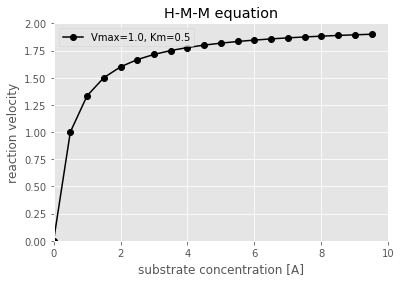

In [3]:
#@title SOLUTION
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
Vmax = 2.0
Km = 0.5
a = np.arange(0,10,0.5)
v = Vmax * a / (Km + a)
plt.plot(a,v,'ko-',label="Vmax=1.0, Km=0.5")
plt.xlabel("substrate concentration [A]")
plt.ylabel("reaction velocity")
plt.title("H-M-M equation")
plt.xlim(0,10)
plt.ylim(0,Vmax)
plt.legend();

From the above plot, there's no doubt that our model is non-linar. In fact, the above equation is an hyperbola. To fit our parameters $V_{max}$ and $K_m$, we have two options: using a non-linear regression procedure, or transfomring our data to recast the model into a linear form. Let's look at the second approach.

If we take the reciprocals of both sides of the H-M-M equation:

<br><br>
$$v = \frac{V_{max}[A]}{K_m+[A]}$$
<br>
$${1 \over v} = \frac{K_m+[S]}{V_{max}[S]}$$
<br>
$$\boxed{{1 \over v} = \frac{K_m}{V_{max}}\frac{1}{[S]}+{1 \over V_{max}}}$$
<br><br>

and so by plotting ${1 / v}$ *versus* $1 / [S]$ we will get a straing line with slope $K_m / V_{max}$ and $y$-intercept $1 /V_{max}$

**HANDS-ON:** make the previous plot with the reciprocally transformed data  and confirm it produces a straight line. 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


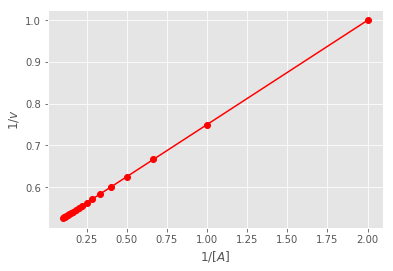

In [4]:
#@title SOLUTION
plt.xlabel("$1/[A]$")
plt.ylabel("$1/v$")
plt.plot(1/a,1/v,'ro-');

(You can safely ignore the division by zero error. In normal conditions, you would not run an experiment with zero substrate concentration...)

**HANDS-ON:** apply a linear regression to the transformed data, and obtain the initial parameter values (you need to remove the first "inf" point from the arrays,
or polyfit will crash)

In [6]:
#@title SOLUTION
m, b = np.polyfit(1/a[1:], 1/v[1:],deg=1)
Vmhat = 1/b 
Kmhat = m / b
print(Kmhat, Vmhat)

0.5000000000000001 2.000000000000001


Of course you will retrieve the original values, because there isn't any erro in these data ! 

#### Working with a real dataset

We are now going to download a dataset in csv format from the following link: https://raw.githubusercontent.com/pjmartel/python-for-scientists/master/datasets/kinetics_dataset_2.csv

This dataset contains *three* velocity values for each substrate concentration - running triplicates is a good way to get more precise values and a better feeling for the distribution of experimental errors.  To perform our fitting, we will take as velocity values  for the *averages* of each set of  three replicate values. 

**HANDS-ON:** Read the csv file into a pandas dataframe. Create two new columns, containing the average and the standard deviation of the triplicates. 

In [0]:
#@title SOLUTION
import pandas as pd
enz_data = pd.read_csv("https://raw.githubusercontent.com/pjmartel/python-for-scientists/master/datasets/kinetics_dataset_2.csv")
enz_data['MeanV'] = enz_data.loc[:,'v1':'v3'].mean(axis=1)
enz_data['Std'] = enz_data.loc[:,'v1':'v3'].std(axis=1)
enz_data

**HANDS-ON:** 
1. Make a plot of the standard deviation of the replicates against [A] to check for any pattern in the error distribution
2. Make a plot of MeanV against [A] 
3. Do a linear regression on the reciprocally transformed data to estimate $K_m$ and $V_max$
4. Use the code for  the linear regression with intervals to estimate the 95% error bounds on the estimates
5. Do a regression plot and a residuals plot with the Seaborn library to check for the presence of outliers.

